1) Business Understanding


Introduction

Problem Statement:

The goal of this project is to work to advise an organization that is venturing into new business of Purchasing Aircrafts for Commercial and Private use by enterprises on aircrafts they should purchase. The company need to make key decisions on which aircraft to purchase and understand the potential risks of the aircraft business if they are to venture into it.In the Dataset, ill be working on, I'll be doing data understanding , cleaning and analysis, to be able to make judgement and advise management. 


Stakeholders:

The various Stakeholders that can use these information are:

1) Management Team- These are the primary stakeholders for this exercise, as they are the key decision makers.

In this analysis, we will focus in determining which aircraft are the lowest risk for the company to start this new business endeavor.( Which aircraft to Purchase)

2) Flight Team- These are the technical players who will use information to understand the risks and metrics that were used to propose best aircraft to purchase


Conclusion:

By using historical data such as data related to accident rates, and past models performance etc, can be used to help make informed decisions and perform qualitative analysis. This analysis will be used in purchasing decisions and influence other future management decisions.

Starting with Importing Libraries and Loading Dataset to be used

In [45]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Load dataset to be used in the anlysis

In [46]:
df=pd.read_csv(r"C:\Users\DELL\Documents\moringa\Flatiron\Assignments\Phase 1\AviationData-1.csv", encoding='latin1', low_memory=False)

2) Data Understanding

Source of Data: The NTSB aviation accident dataset up to Feb 2021 -

Link https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=AviationData.csv)

Data Set used: "AviationData.csv"

Why dataset is Useful: The data is related to Aircraft and contains key records on safety of aircraft such as:  Accident number, total fatal injuries, Total serious injuries etc , that can be used in analysis to make an informed decision.

In [47]:
#Determining the Shape of the data set
df.shape

#Result shows the dataset contains 88889 rows and 31 columns

(88889, 31)

In [48]:
#View the summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [49]:
#Let us determine the statistics of columns with numerical data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [50]:
#Finding the first 5 rows of the dataset

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [51]:
#Finding columns in the dataset

df.columns.tolist()



['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [52]:
# Let's check the unique Values appearing in the " 'Model' Column

df['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [53]:
#Finding any missing values, for columns

df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

3) Data Preparation

Data preparation at this stage is crucial, as we need to clean data, and ensure we remain with data that is reliable and that is complete for accurate analysis

In [54]:
# Drop Column "Schedule" due to its highest number of missing values. 

df.drop('Schedule', axis=1, inplace=True)

In [55]:
# Confirm whether Column "Schedule" is dropped.

df.columns.to_list

#Confirmed is dropped

<bound method IndexOpsMixin.tolist of Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')>

In [56]:
#Replace missing values with 0 for better analysis with numerical data

replaced_missing_values=['Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

df[replaced_missing_values]=df[replaced_missing_values].fillna(0)


In [57]:
# Check the data types of the columns

df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Da

In [58]:
#Add new column "Total Injuries" for better analysis of what was the Total injuries per aircraft

df['Total Injuries']= df['Total.Fatal.Injuries'] +df ['Total.Serious.Injuries'] +df['Total.Minor.Injuries']

In [59]:
#Check to see whether we have duplicate values so as to make the data

df.duplicated().sum()

#There are 0, duplicates

0

4) Data Analysis

After data cleaning phase, we are ready to perform some analysis on the dataset.

We will be using basis statistical measures to perform our analysis.:

-Mean,- to analyse the averages
-Standard Deviation- to analyse the deviations from mean
-Correlation- understand relationship of variables




In [60]:
# In the new column we added earlier "Total Injuries" , lets determine the Average of the "Total Injuries"

df['Total Injuries']=df['Total Injuries'].mean()

print(df['Total Injuries'])

0        1.114379
1        1.114379
2        1.114379
3        1.114379
4        1.114379
           ...   
88884    1.114379
88885    1.114379
88886    1.114379
88887    1.114379
88888    1.114379
Name: Total Injuries, Length: 88889, dtype: float64


In [61]:
# Lets do a correlation analysis between Injuries to see whether there exists a relationship

correlated_data= df[[ 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',]].corr()

print(correlated_data)

                        Total.Fatal.Injuries  Total.Serious.Injuries  \
Total.Fatal.Injuries                1.000000                0.108066   
Total.Serious.Injuries              0.108066                1.000000   
Total.Minor.Injuries                0.035698                0.216400   
Total.Uninjured                    -0.015679                0.041725   

                        Total.Minor.Injuries  Total.Uninjured  
Total.Fatal.Injuries                0.035698        -0.015679  
Total.Serious.Injuries              0.216400         0.041725  
Total.Minor.Injuries                1.000000         0.097938  
Total.Uninjured                     0.097938         1.000000  


In [62]:
#Lets do standard deviation for the same metrics as above

deviations= df[[ 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',]].std()

print(deviations)


Total.Fatal.Injuries       5.126649
Total.Serious.Injuries     1.434614
Total.Minor.Injuries       2.083715
Total.Uninjured           27.002011
dtype: float64


5)Visualization

-In this section, We shall be using visualization to better show trends of our data, for better understanding by the management and other stakeholders.
Analysis will focus on :

a)Accident Trends,
b)Checking which airline makes have most fatalities
c)Checking which airline carriers have most fatalities

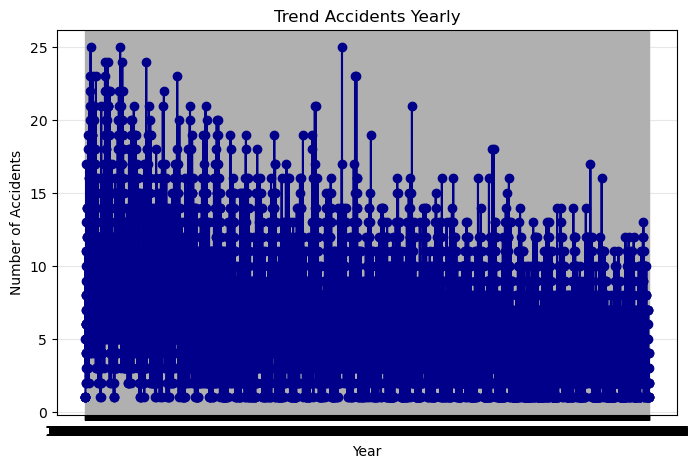

In [67]:
# Let us now create visualization showing trend of accidents yearly as per the dataset


accidents_yearly=df.groupby('Event.Date').size()    #grouping data by the dates

plt.figure(figsize=(8,5))
plt.plot(accidents_yearly.index, accidents_yearly.values, marker='o', color='darkblue')
plt.title("Trend Accidents Yearly")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(alpha=0.3)
plt.show()


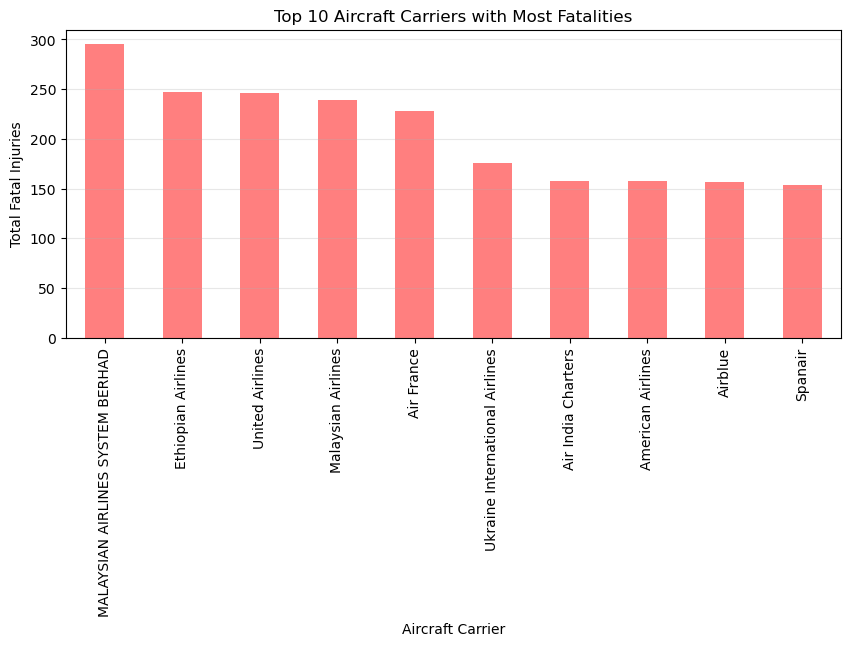

In [68]:
#Visualize now to show how Different 'Carriers' are involved with most accidents

# Use groupby to group carriers and their total fatalities
fatalities_by_aircraft = df.groupby('Air.carrier')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Filter top 10 since we have alredy sorted in ascending order above
top_aircraft = fatalities_by_aircraft.head(10)

# Plot Top 10
plt.figure(figsize=(10, 4))
top_aircraft.plot(kind='bar', color='red', alpha=0.5)
plt.title("Top 10 Aircraft Carriers with Most Fatalities")
plt.xlabel("Aircraft Carrier")
plt.ylabel("Total Fatal Injuries")
plt.grid(axis='y', alpha=0.3)
plt.show()

#From the Visualization, we can conclude that Malaysian Airlines System Berhad carrier have the most fatalities 
#Hence if the company should Purchase aircrafts, they may need to avoid purchasing aircrafts from the  Malaysian Airlines System Berhad carrier

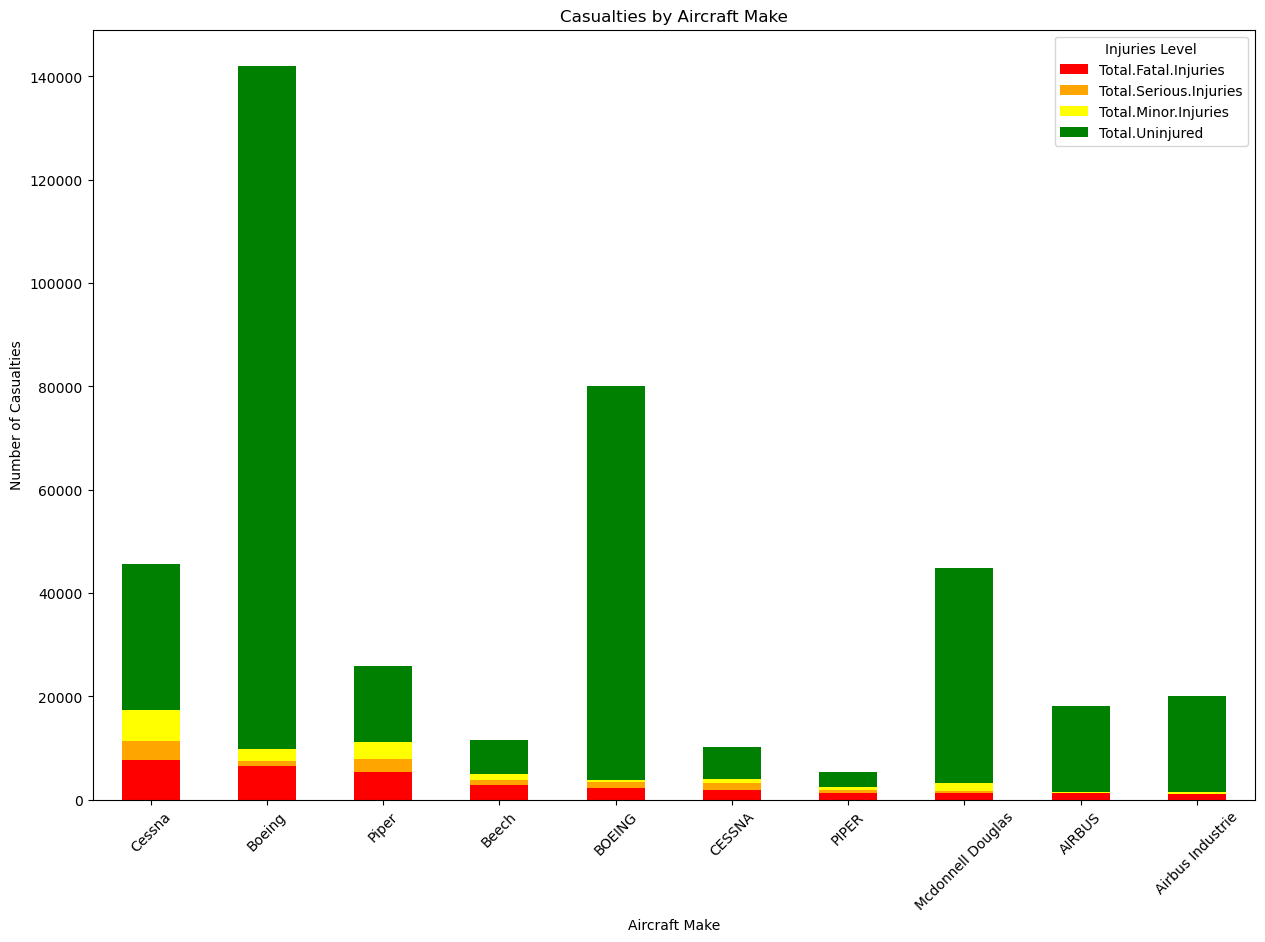

In [77]:
#Lets now use groupby to see how safe the different Aircraft Makes are, and their levels of fatalities

safety_bar = df.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()
safety_bar = safety_bar.sort_values('Total.Fatal.Injuries', ascending=False).head(10)

# Plot for visualizing

safety_bar[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].plot(
    kind='bar', 
    figsize=(15,10),
    stacked=True, 
    color=['red', 'orange', 'yellow', 'green'])

plt.title("Casualties by Aircraft Make")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Casualties")
plt.legend(title="Injuries Level")
plt.xticks(rotation=45)
plt.show()

6) Conclusion

In conclusion, based on our visual analysis, we can discuss our findings as below:

i) Accident Trends-  We see a downward trend as number of accidents keep reducing over the years and this may be due to improvement of technology and provision of more safety standards in the aviation industry.

ii) Aircraft Carriers- Some aircraft carriers report high fatalities over the years compared to others.
eg.Malaysian Airlines System Berhad and Ethiopian Airlines reported high fatalities numbers.

iii) Aircraft Make- Some Aircraft Make models, showed their levels of safety, with Boeing Aircraft Make and Cessna reporting high fatality rates, however Boieng is a better performer than Cessna, as it recorded more persons Uninjured in accidents compared to Cessna.